In [3]:
import twitter
import json

CONSUMER_KEY = "zQZLXhFIXIY6cmdvW3Aspc7BJ"
CONSUMER_SECRET = "StcUuIC2ALEOPL7KzOvvvwiWHBiUclIvYxgCQ1OIQyBRQoXmkB"
ACCESS_TOKEN = "3258759740-jzFhbm8VOmTcWL5VIHouCsCxWr8UKN4KpTxCrKP"
ACCESS_TOKEN_SECRET = "zS8Px4bZxHJFWZge0l9mXCNYs4ijVWwX1wPdqcXmuKrU6"
auth = twitter.oauth.OAuth(ACCESS_TOKEN, ACCESS_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth = auth)

In [4]:
# Fetching results based on language
search_query = "joe biden"

results_in_german = twitter_api.search.tweets(q=search_query, count=800, lang='de') 
results_in_english = twitter_api.search.tweets(q=search_query, count=800, lang='en') 

In [5]:
statuses_in_english=results_in_english['statuses']

status_texts = [ status['text'] for status in statuses_in_english ]

screen_names = [ user_mention['screen_name'] for status in statuses_in_english 
                for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] for status in statuses_in_english 
            for hashtag in status['entities']['hashtags'] ]

In [6]:
words = [ w for t in status_texts for w in t.split() ]
print(json.dumps(screen_names[0:5], indent=4))
print(json.dumps(hashtags[0:5], indent=4))
print(json.dumps(words[0:5], indent=4))

[
    "RepMaryMiller",
    "theliamnissan",
    "laurenboebert",
    "LegionSocialist",
    "OccupyDemocrats"
]
[
    "inflation",
    "defconwsalerts",
    "FreePalestine",
    "FreePalestine"
]
[
    "RT",
    "@RepMaryMiller:",
    "Before",
    "Joe",
    "Biden"
]


In [7]:
from collections import Counter

for cl in [words, screen_names, hashtags]:
    a=1
c = Counter(cl)
print(c.most_common()[:3]) # top 3

[('FreePalestine', 2), ('inflation', 1), ('defconwsalerts', 1)]


In [10]:
from prettytable import PrettyTable
for label, data in (('Word', words),('Screen Name', screen_names),('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r'
    print(pt)

+-------+-------+
| Word  | Count |
+-------+-------+
| RT    |    85 |
| a     |    76 |
| the   |    58 |
| Joe   |    53 |
| Biden |    49 |
| to    |    43 |
| of    |    42 |
| for   |    28 |
| is    |    27 |
| in    |    23 |
+-------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| OccupyDemocrats |    12 |
| RepMaryMiller   |     5 |
| miniminicult    |     5 |
| JesseKellyDC    |     5 |
| RileyMooreWV    |     4 |
| NickAdamsinUSA  |     4 |
| theliamnissan   |     3 |
| FoxNews         |     3 |
| TulsiGabbard    |     3 |
| DanielTurnerPTF |     3 |
+-----------------+-------+
+----------------+-------+
| Hashtag        | Count |
+----------------+-------+
| FreePalestine  |     2 |
| inflation      |     1 |
| defconwsalerts |     1 |
+----------------+-------+


Text(0.5, 0, 'Word Rank')

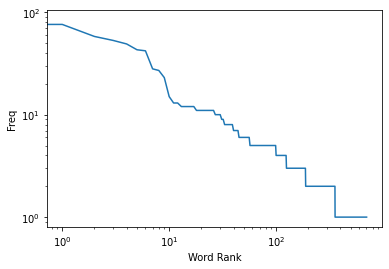

In [12]:
import matplotlib.pylab as plt

word_counts = sorted(Counter(words).values(), reverse=True)
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

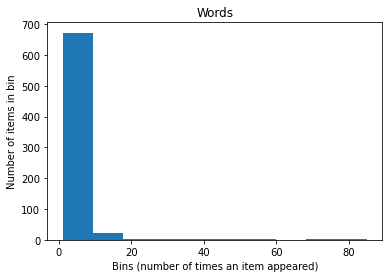

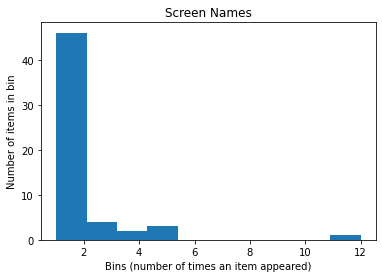

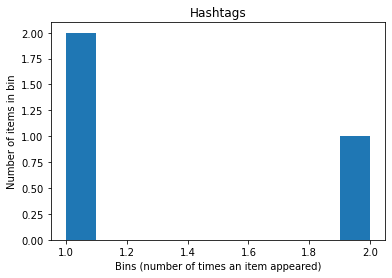

<Figure size 432x288 with 0 Axes>

In [13]:
for label, data in (('Words', words),('Screen Names', screen_names),('Hashtags', hashtags)):
    c = Counter(data)
    plt.hist(c.values())
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    plt.figure()

In [17]:
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return total_words / len(statuses)

lexical_diversity(words)

0.3358815097945533

In [22]:
retweets = [(status['retweet_count'],status['retweeted_status']['user']['screen_name'],status['text'])
                for status in statuses_in_english if 'retweeted_status' in status]
top_retweets = sorted(list(set(retweets)), reverse=True)[:5]

In [38]:
top_retweets
pt = PrettyTable(field_names=['Count','Screen Name','Text'])
pt.border = True
pt.header = True
pt.padding_width = 10
c = Counter(data)
[pt.add_row(kv) for kv in top_retweets]
pt.align['count'], pt.align['Screen Name'], pt.align['Text']='l','c','r'
print(pt)

+-------------------------+-----------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|          Count          |            Screen Name            |                                                                                                                                                  Text          |
+-------------------------+-----------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|          13772          |          DanielTurnerPTF          |                                         RT @DanielTurnerPTF: Joe Biden laid off 11,000 Keystone XL pipeline workers just to beg Saudi Arabia for oil.          |
|          13495          |          OccupyDemocrats          |           RT @OccupyDemocrats: BREAK

[1952, 3775, 7766, 22, 1492, 13495, 389, 1077, 13495, 1077, 922, 2997, 1462, 7934, 25, 1, 69, 1462, 40, 125, 4, 13495, 13495, 795, 933, 1771, 16, 25, 69, 206, 1386, 5124, 1, 1076, 13772, 2907, 389, 5124, 13772, 162, 210, 6, 13495, 13495, 1547, 2997, 206, 1952, 389, 1, 13495, 1952, 389, 2, 3382, 3775, 7766, 3775, 13772, 13495, 1335, 2, 1771, 1952, 1077, 262, 13495, 1462, 158, 922, 158, 13495, 453, 7934, 795, 162, 389, 1462, 13495, 5124, 61, 3382, 1952, 42, 312]


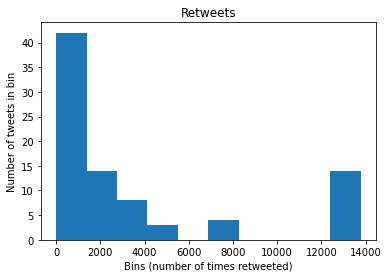

In [30]:
counts = [count for count, _, _ in retweets]
plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')
print(counts)